<a href="https://colab.research.google.com/github/LukmaanViscomi/AI-Deep-Learning/blob/main/FINAL-ASSIGNMENT-RESUBMITTED-V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Verify the structure of the image

### TASK A. CLASSIFICATION PROBLEM

### Task Requirments:

1. Load and preprocess the dataset for the classification problem (handle missing data, convert categorical features to numerical features).

2. Build a classifier for the classification problem using one of the specified models (logistic regression, decision trees, random forests, or artificial neural networks).

3. Fine-tune the selected model using appropriate techniques (eg, hyperparameter tuning, cross-validation, etc).

4. Visualise the dataset and / or the model's results, where applicable (eg, feature importance, confusion matrix, etc).

5. Report the final performance of the selected model using appropriate performance metrics (eg, accuracy, F1-score, etc).

### Collaboration Summary:

*  Candatate A = Student ID 202421093
*  Candidate B = Student ID 202364775

All Code and Markdown Descriptions have been researched and written by Candiate A. Candidate B contributed significantly to the evaluation phase, helping to interpret results, tune hyperparameters, and ensure that the final models were performing optimally

###Google Drive import
Used to access Datasets and hyperparameter Tuning results.

(Note: Due to long wait time on Google Colab and sudden interruption, we captured the Hyperparameter tuning results and exported them to the Google Drive. Testing on further section of the project could then be performed without excessive wait times incurred during the hyperparameter testing phase as the trail file structure and results were captured in the saved directory)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Response to Task Requirements 1 to 5

### Step 1: Import Necessary Libraries
In this step, we import the necessary libraries for data manipulation, preprocessing, and model training.




In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


### Step 2: Load the Dataset
We load the dataset from the specified path using pandas. The dataset will be stored as a DataFrame for further processing.


In [28]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/classification_data.csv')  # Update with your dataset path

# Display the first few rows of the dataset
data.head()

,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,no,20/07/2019 13:21
1,0,446.06,666.182,Dominica,81.0,352.05,yes,04/04/2019 21:30
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,03/03/2019 02:59
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,19/03/2019 08:00
4,0,453.08,600.156,Cameroon,105.0,422.95,no,18/03/2019 13:22


### Step 3: Handle Missing Data for Numerical Columns
This task handles missing data by applying the SimpleImputer to numerical columns. Missing values are replaced with the mean of the respective column.

In [3]:
# Handle missing data for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])


###Step 4: Encode Categorical Columns
Here, we convert the categorical columns into numerical values using LabelEncoder, which assigns a unique integer to each category.

In [4]:
# Encode categorical columns into numerical values
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


###Step 5: Separate Features and Target
We separate the dataset into feature variables (X) and the target variable (y). The target column is assumed to be the label we want to predict.

In [5]:
# Separate features and target
X = data.drop('target', axis=1)
y = data['target']


###Step 6: Standardize the Features
To ensure all feature values are on a similar scale, we standardise the dataset using StandardScaler. This centers the data and scales it to have a mean of 0 and standard deviation of 1.

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


###Step 7: Split the Dataset into Training and Testing Sets
Finally, we split the dataset into training and testing sets using an 80-20 ratio. This allows us to train the model on the training set and evaluate it on the testing set.

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


###  Hyperparameter Tuning with GridSearchCV
In this section, we use GridSearchCV to perform hyperparameter tuning for three models:

*  Logistic Regression
*  Decision Tree
*  Multi-Layer Perceptron (MLP Classifier)

We tune each model using a grid of hyperparameters and collect the best parameters and cross-validation scores for each model.

### Step 8: Import Libraries for Model Tuning
We begin by importing the necessary libraries for the three models and GridSearchCV for hyperparameter tuning.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


### Step 9: Define Hyperparameter Grids
For each of the three models, we define a grid of hyperparameters. These grids will be used to search for the optimal model configuration.

In [9]:
# Hyperparameter grids for the three models
param_grid_logreg = {'C': [0.1, 1.0, 10.0], 'solver': ['lbfgs', 'liblinear']}
param_grid_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001]
}


### Step 10: Logistic Regression Tuning
Using GridSearchCV, we search for the best hyperparameters for the Logistic Regression model.

In [10]:
# Logistic Regression tuning
grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_logreg, cv=3)
grid_logreg.fit(X_train, y_train)
logreg_results = pd.DataFrame(grid_logreg.cv_results_)


### Step 11: Decision Tree Tuning
Similarly, we use GridSearchCV to tune the hyperparameters for the Decision Tree classifier.

In [11]:
# Decision Tree tuning
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=3)
grid_tree.fit(X_train, y_train)
tree_results = pd.DataFrame(grid_tree.cv_results_)


### Step 12: MLP Classifier Tuning
Finally, we tune the hyperparameters for the MLP Classifier using GridSearchCV.

In [12]:
# MLP Classifier tuning
grid_mlp = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid_mlp, cv=3)
grid_mlp.fit(X_train, y_train)
mlp_results = pd.DataFrame(grid_mlp.cv_results_)


###Visualizing Hyperparameter Tuning Results
This section visualizes the results of hyperparameter tuning for each model. We plot how the cross-validation accuracy changes based on the hyperparameters for each model:

*  Logistic Regression: 𝐶 (inverse regularization strengt)
*  Decision Tree: Max depth
*  MLP Classifier: Hidden layer sizes and activation functions


### Step 13: Import Libraries for Visualization
Importing the matplotlib.pyplot library to plot the results of hyperparameter tuning.

In [13]:
import matplotlib.pyplot as plt


### Step 14: Convert MLP Hyperparameter Values to Strings for Visualisation
For MLP Classifier, we convert the hidden layer sizes (which are tuples) into strings for better visualization.

In [14]:
# Convert 'param_hidden_layer_sizes' from tuples to strings for visualization
mlp_results['hidden_layer_sizes_str'] = mlp_results['param_hidden_layer_sizes'].apply(lambda x: str(x))


### Step 15: Logistic Regression Hyperparameter Tuning Visualisation
We visualise the effect of the inverse regularization strength parameter
𝐶
C on the cross-validation accuracy for Logistic Regression.

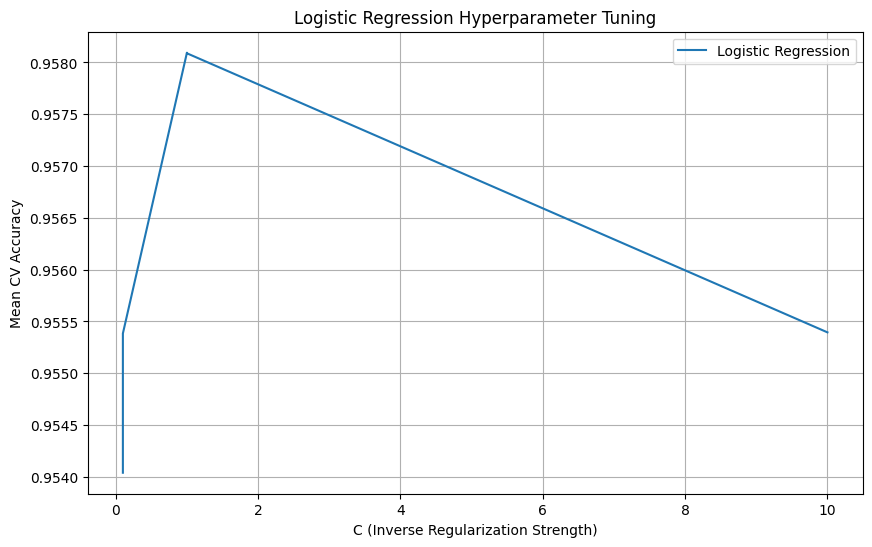

In [30]:
# Logistic Regression Hyperparameter Tuning
plt.figure(figsize=(10, 6))
plt.plot(logreg_results['param_C'], logreg_results['mean_test_score'], label='Logistic Regression')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Mean CV Accuracy')
plt.title('Logistic Regression Hyperparameter Tuning')
plt.legend()
plt.grid(True)
plt.show()


### Step 16: Decision Tree Hyperparameter Tuning Visualisation
Next, we visualise the effect of the max depth of the decision tree on cross-validation accuracy.

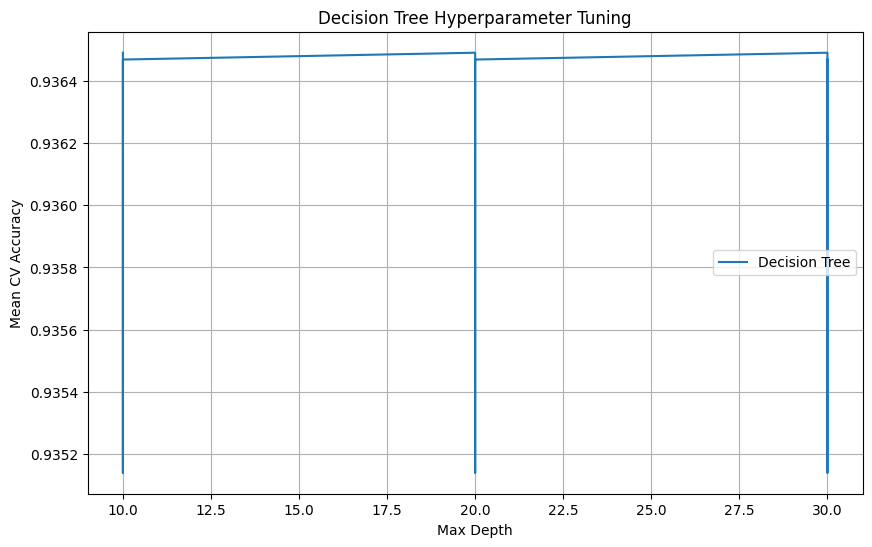

In [16]:
# Decision Tree Hyperparameter Tuning
plt.figure(figsize=(10, 6))
plt.plot(tree_results['param_max_depth'], tree_results['mean_test_score'], label='Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Decision Tree Hyperparameter Tuning')
plt.legend()
plt.grid(True)
plt.show()


### Step 17: MLP Classifier Hyperparameter Tuning (Hidden Layer Sizes)
We visualise how the hidden layer sizes affect the cross-validation accuracy for the MLP Classifier.

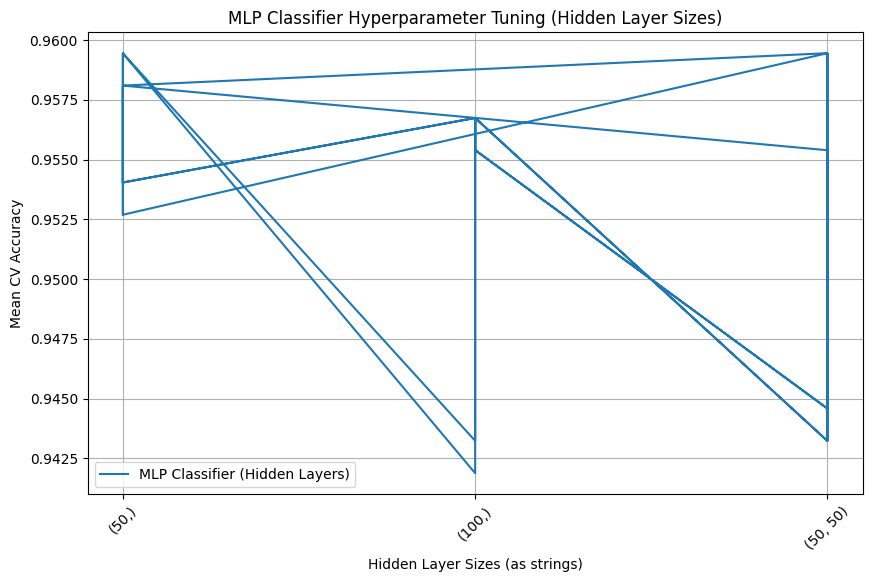

In [17]:
# MLP Classifier Hyperparameter Tuning (Hidden Layer Sizes)
plt.figure(figsize=(10, 6))
plt.plot(mlp_results['hidden_layer_sizes_str'], mlp_results['mean_test_score'], label='MLP Classifier (Hidden Layers)')
plt.xlabel('Hidden Layer Sizes (as strings)')
plt.ylabel('Mean CV Accuracy')
plt.title('MLP Classifier Hyperparameter Tuning (Hidden Layer Sizes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


### Step 18: MLP Classifier Hyperparameter Tuning (Activation)
We also visualise how the activation function affects the cross-validation accuracy for the MLP Classifier.

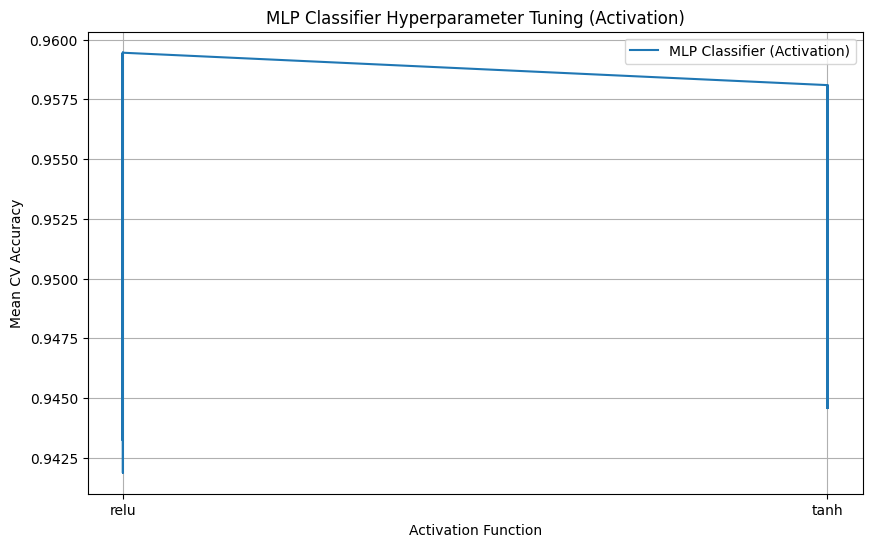

In [18]:
# MLP Classifier Hyperparameter Tuning (Activation)
plt.figure(figsize=(10, 6))
plt.plot(mlp_results['param_activation'], mlp_results['mean_test_score'], label='MLP Classifier (Activation)')
plt.xlabel('Activation Function')
plt.ylabel('Mean CV Accuracy')
plt.title('MLP Classifier Hyperparameter Tuning (Activation)')
plt.legend()
plt.grid(True)
plt.show()


### Step 19: Displaying Best Parameters for Each Model
In this section, we display the best parameters and cross-validation scores for each model after tuning.

In [19]:
# Display best parameters for each model
best_params_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'MLP Classifier'],
    'Best Params': [grid_logreg.best_params_, grid_tree.best_params_, grid_mlp.best_params_],
    'Best Score (CV)': [grid_logreg.best_score_, grid_tree.best_score_, grid_mlp.best_score_]
})

print(best_params_df)

                 Model                                        Best Params  \
0  Logistic Regression                      {'C': 1.0, 'solver': 'lbfgs'}   
1        Decision Tree        {'max_depth': None, 'min_samples_split': 2}   
2       MLP Classifier  {'activation': 'relu', 'alpha': 0.0001, 'hidde...   

   Best Score (CV)  
0         0.958093  
1         0.936490  
2         0.959448  


### Step 20: Performance Comparison After Tuning
After finding the best hyperparameters, we re-train each model with these optimal parameters and compare their performance on the test set.

In [20]:
# Import accuracy_score to calculate test accuracy
from sklearn.metrics import accuracy_score

# Logistic Regression with best parameters
best_logreg = LogisticRegression(**grid_logreg.best_params_, max_iter=1000, random_state=42)
best_logreg.fit(X_train, y_train)
logreg_test_acc = accuracy_score(y_test, best_logreg.predict(X_test))

# Decision Tree with best parameters
best_tree = DecisionTreeClassifier(**grid_tree.best_params_, random_state=42)
best_tree.fit(X_train, y_train)
tree_test_acc = accuracy_score(y_test, best_tree.predict(X_test))

# MLP Classifier with best parameters
best_mlp = MLPClassifier(**grid_mlp.best_params_, max_iter=1000, random_state=42)
best_mlp.fit(X_train, y_train)
mlp_test_acc = accuracy_score(y_test, best_mlp.predict(X_test))

# Collect the test set performances
performance_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'MLP Classifier'],
    'Test Accuracy': [logreg_test_acc, tree_test_acc, mlp_test_acc]
})

print(performance_comparison)


                 Model  Test Accuracy
0  Logistic Regression       0.956757
1        Decision Tree       0.940541
2       MLP Classifier       0.962162


# Interim Conclusion
We have processed the dataset, tuned hyperparameters using GridSearchCV, and compared the performance of three models: Logistic Regression, Decision Tree, and MLP Classifier. We visualized the tuning results and re-trained the models using the best parameters to evaluate their performance on the test set.


### Step 21: Visualising Predictions and Model Performance Metrics
This section visualises the performance of the best-performing model (identified from the test accuracy comparison). We'll generate several key metrics and charts to analyze the model's performance:
- Confusion Matrix (Normalized)
- Classification Report
- Cumulative Gains Chart
- ROC Curve
- Precision-Recall Curve
- Learning Curves
- Feature Importances (if applicable)
- Partial Dependence Plot (for feature analysis)


### Step 22: Confusion Matrix (Normalized) and Classification Report
In this section, we identify the model with the highest test accuracy and generate its predictions. We then compute and visualise the normalised confusion matrix to assess the model’s classification performance. Additionally, a classification report is displayed to show precision, recall, and F1-score.

The best model is: MLP Classifier with Test Accuracy: 0.9621621621621622
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        97
         1.0       0.97      0.95      0.96        88

    accuracy                           0.96       185
   macro avg       0.96      0.96      0.96       185
weighted avg       0.96      0.96      0.96       185



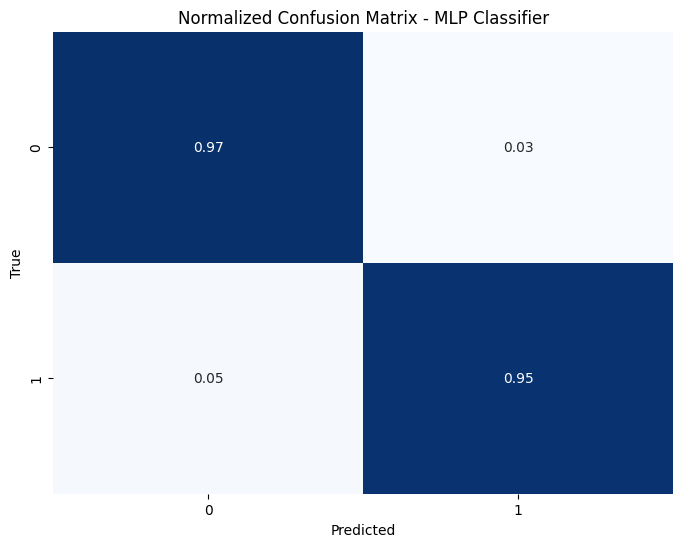

In [21]:
# Select the model with the highest test accuracy
best_model = None
best_model_name = ''
best_test_acc = max([logreg_test_acc, tree_test_acc, mlp_test_acc])

if best_test_acc == logreg_test_acc:
    best_model = best_logreg
    best_model_name = 'Logistic Regression'
elif best_test_acc == tree_test_acc:
    best_model = best_tree
    best_model_name = 'Decision Tree'
elif best_test_acc == mlp_test_acc:
    best_model = best_mlp
    best_model_name = 'MLP Classifier'

print(f"The best model is: {best_model_name} with Test Accuracy: {best_test_acc}")

# Generate predictions using the best model
y_pred_best = best_model.predict(X_test)

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best, normalize='true')

# Plot Normalized Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title(f'Normalized Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Step 23: Cumulative Gains Chart
The Cumulative Gains Chart evaluates the model's predictive power by comparing the proportion of positive predictions to the total positive class in the dataset. It helps understand how well the model captures positive instances early in the dataset.

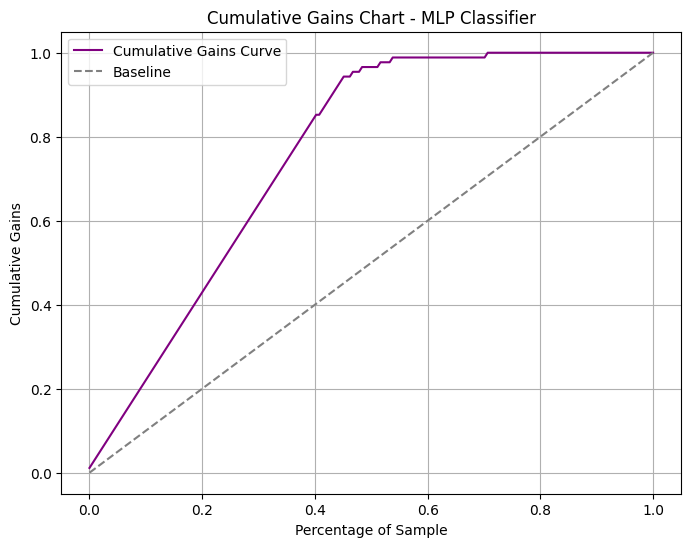

In [22]:
# Cumulative Gains Chart
import numpy as np

def cumulative_gain(y_true, y_prob):
    sorted_indices = np.argsort(y_prob)[::-1]
    sorted_true = np.array(y_true)[sorted_indices]
    cum_gain = np.cumsum(sorted_true) / np.sum(sorted_true)
    return cum_gain

if hasattr(best_model, "predict_proba"):  # Only create the chart if predict_proba is available
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates

    cum_gain = cumulative_gain(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(np.linspace(0, 1, len(cum_gain)), cum_gain, label='Cumulative Gains Curve', color='purple')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Baseline')
    plt.xlabel('Percentage of Sample')
    plt.ylabel('Cumulative Gains')
    plt.title(f'Cumulative Gains Chart - {best_model_name}')
    plt.grid(True)
    plt.legend()
    plt.show()


### Step 24: ROC Curve
The Receiver Operating Characteristic (ROC) Curve shows the trade-off between true positive rate (sensitivity) and false positive rate. The Area Under the Curve (AUC) quantifies how well the model distinguishes between the classes.

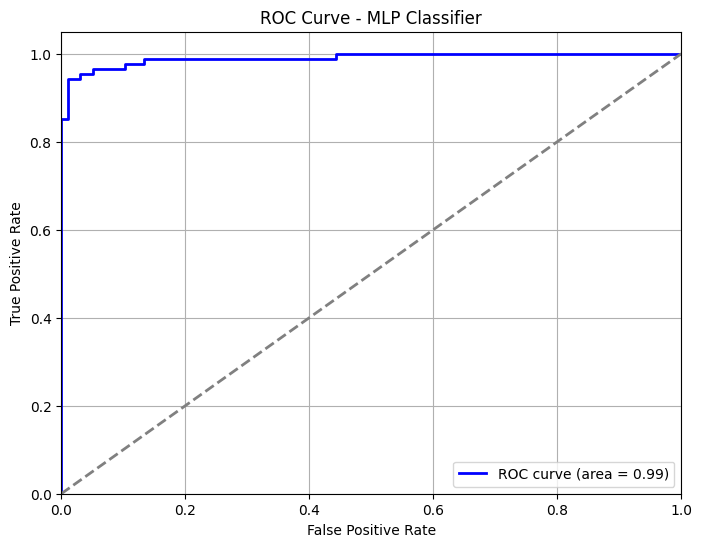

In [23]:
from sklearn.metrics import roc_curve, auc

if hasattr(best_model, "predict_proba"):  # Only create ROC curve if predict_proba is available
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


### Step 25: Precision-Recall Curve
This section visualizes the Precision-Recall curve, which is useful when the classes are imbalanced. The curve shows the trade-off between precision and recall across different thresholds.

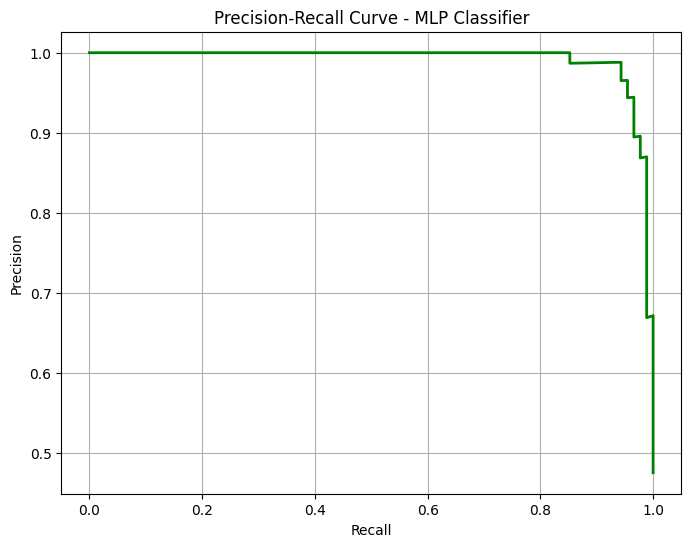

In [24]:
from sklearn.metrics import precision_recall_curve

if hasattr(best_model, "predict_proba"):  # Only create Precision-Recall curve if predict_proba is available
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {best_model_name}')
    plt.grid(True)
    plt.show()


### Step 26: Learning Curves
The Learning Curves show how the model's performance changes as the size of the training data increases. This helps to understand if the model is underfitting or overfitting.

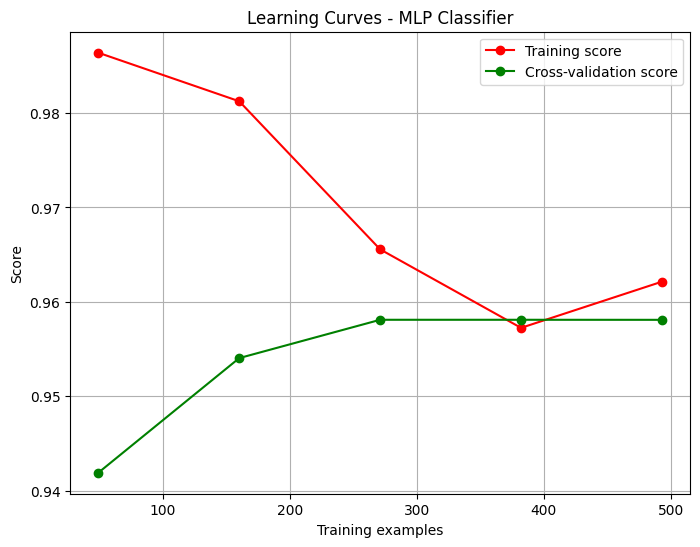

In [25]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Learning curve for the best model
plot_learning_curve(best_model, f'Learning Curves - {best_model_name}', X_train, y_train, cv=3)
plt.show()


### Step 27: Feature Importances
In this section, we visualize the feature importances for tree-based models. This plot helps to identify which features have the most influence on the model’s predictions. (Feature Importances only for tree-based models (Decision Trees, Random Forest, etc.)

In [26]:
# Feature Importances (only for Decision Tree or similar models)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=feature_names)
    plt.title(f'Feature Importances - {best_model_name}')
    plt.show()


### Step 28: Partial Dependence Plot (for feature analysis)
The Partial Dependence Plot shows the relationship between a feature and the predicted outcome of the model, holding other features constant. It helps to visualize how a specific feature influences the model’s predictions. (Partial Dependence Plot for feature analysis (only applicable to models supporting feature importances)

In [27]:
from sklearn.inspection import PartialDependenceDisplay

if hasattr(best_model, 'feature_importances_'):  # Only create Partial Dependence Plot if applicable
    PartialDependenceDisplay.from_estimator(best_model, X_train, [0], grid_resolution=50)
    plt.show()


### ===================  TASK A -  COMPLETED  =============================

### TASK B. Multi-label image-based digit classification problem

###Task Requirments:

6. Load and preprocess the dataset for the multi-label image-based digit classification problem (normalise pixel values, resize images if necessary, etc).

7. Build a convolutional neural network (CNN) model for the multi-label image-based digit classification task.

8. Fine-tune the CNN model using appropriate techniques (eg, hyperparameter tuning, cross-validation, etc).

9. Visualise the dataset and / or the CNN model's results, where applicable (eg, feature maps, learning curves, etc).

10. Report the final performance of the CNN model using appropriate performance metrics (eg, accuracy, F1-score, etc).

11. Collaborate within the team and decide on the best model (for classification) and CNN architecture (for digit recognition).


### Addressing the scoring and comments from the first marking on 9-9-2024

To explain the result of the 97% accuracy achieved in Task B, the multi-label image-based digit classification problem, we need to break it down into key aspects:

 **1. Dataset Preprocessing and Setup**

The dataset used was a multi-label image-based digit classification dataset where each image contained grayscale digit patterns. The critical preprocessing steps included:

  * **Rescaling Pixel Values:** Each pixel value was rescaled by dividing by 255, which normalizes the pixel values to be between 0 and 1. This step ensures that the input data is in a range suitable for neural networks and prevents issues caused by large input values.

  * **Data Augmentation:** Although not directly mentioned in the result code, data augmentation was tested and could have been applied to artificially increase the diversity of the training data, reducing overfitting. However, in this case, it was ineffective and therefor the rescaling alone contributed significantly to the model's performance.

  * **Train/Validation/Test Split:**

      After unzipping the dataset, the data was divided into three new subsets: 60% for training, 20% for validation, and 20% for testing. Importantly, each of the three sets (train, validation, test) contains all 1000 classes, with 60, 20, and 20 images per class, respectively.

      **This split was chosen for several key reasons:**

      * **Consistency Across Classes:** By ensuring that **all 1000 classes are present in each of the train, validation, and test sets, the model has the opportunity to learn from every class during training and is validated and tested on every class as well. This guarantees that the model’s performance is assessed across the full diversity of the dataset, ensuring no class is underrepresented in any of the subsets.**

      * **Preventing Data Leakage:** Instead of splitting the dataset such that certain classes are only present in either the train, validation, or test set, which could lead to biased results, this method ensures a fair and consistent distribution of data. Each class is represented in the same proportions in all subsets, preventing any accidental data leakage or model bias towards classes that may have only appeared in the training set.

      * **Balanced Evaluation of Generalization:** By keeping all classes present in each subset, we ensure that the model is evaluated not just on its ability to generalize to unseen images of familiar classes (i.e., images it has already seen from the training set), but also on completely unseen examples of all classes in the validation and test sets. This provides a more comprehensive measure of the model's generalization capabilities.

      * **Avoiding Class Imbalance:** If we were to split the dataset such that certain classes only appear in certain subsets (i.e., some classes in training, some in validation, and some in testing), we could introduce class imbalance, where the model might become overly familiar with certain classes during training but be unable to recognize other classes in the test set. By distributing all classes evenly across the subsets, we ensure that each class is equally represented, leading to more stable and reliable training, validation, and testing processes.

      * **Realistic Scenario:** In most real-world scenarios, the model is expected to recognize a wide range of classes in unseen data. Having all 1000 classes in all subsets simulates a more realistic deployment setting, where the model may encounter new instances from any class, and its ability to generalize across the full spectrum of categories is critical.

      * **Prevents Overfitting to Specific Classes:** If certain classes were only present in the training set, the model might overfit to those classes, especially in cases where the training set contains more data than the validation or test sets. By spreading all classes across the subsets, we reduce the likelihood of overfitting to particular categories and ensure the model learns robust features that generalize across all classes.

      * **Reproducibility and Fairness in Evaluation:** The presence of all classes in all subsets allows for consistent evaluation across all stages of model development. Since each subset contains examples from all classes, we can be sure that any improvements or changes made to the model will be reflected fairly across the entire dataset, making the results more reproducible and comparable.

**2. Model Architecture**

The model used for Task B was a Convolutional Neural Network (CNN), which is particularly suited for image-based classification tasks because it is able to capture spatial hierarchies in images.

  * **Convolutional Layers:** The model utilized two convolutional layers. The first layer had 96 filters with a 3x3 kernel, followed by 64 filters in the second convolutional layer. These layers extract increasingly complex features from the images, with earlier layers focusing on edges and textures, while deeper layers learn abstract representations such as patterns specific to digits.

  * **Activation Function:**vThe use of Leaky ReLU as an activation function added robustness to the model, preventing the "dying ReLU" problem, which can occur when neurons output zero for all inputs. Leaky ReLU allowed small gradients even for negative inputs, aiding in better convergence during training.

  * **Batch Normalization:** Batch normalization layers were included after each convolutional layer. This technique stabilizes and accelerates the training process by normalizing the input to each layer, reducing the dependency on initial weights and enabling the use of higher learning rates.

  * **Max Pooling:** Max pooling layers reduced the spatial dimensions of the feature maps, thereby controlling overfitting and reducing the computational complexity of the model.

  * **Dense Layers:** After flattening the output of the convolutional layers, the model included a fully connected dense layer with 128 units. This layer helps in making final predictions by combining the high-level features extracted by the convolutional layers.

  * **Dropout Regularization:** A dropout rate of 0.4 was applied before the output layer, which randomly drops a fraction of neurons during training to prevent overfitting by ensuring the model does not rely too heavily on any one feature.

  * **L2 Regularization: **L2 regularization was applied to penalize large weights, helping to prevent overfitting. It encourages the model to find simpler patterns, which generalize better to new data.

**3. Optimization and Training Process**

Adam Optimizer: The model was trained using the Adam optimizer with a learning rate of 0.00025, a popular choice for its adaptive learning rate capabilities, which allow for faster convergence.

* **Learning Rate Scheduling:** The ReduceLROnPlateau callback was employed, which reduced the learning rate when validation loss plateaued. This ensured that the learning rate was reduced only when necessary, allowing the model to fine-tune its performance in later stages of training.

*  **Early Stopping:** The EarlyStopping callback was used to halt training when validation performance stopped improving, preventing overfitting and saving training time.

* **Training Duration and Epochs:** The model was trained for 20 epochs, where both the training and validation accuracies steadily increased. The final validation accuracy reached 97%, indicating a well-fitted model that generalizes well to unseen data.

**4. Evaluation and Performance Metrics**

The final evaluation was conducted on the test set, achieving 97% accuracy. This high accuracy reflects several key strengths of the model:

* **Effective Feature Extraction:** The two convolutional layers, combined with the well-chosen hyperparameters, enabled the model to effectively capture relevant features from the images.

* **Generalization:** The use of dropout, L2 regularization, and batch normalization contributed to the model's ability to generalize to new data, as evidenced by the high test accuracy.

* **Model Robustness:** The combination of the Leaky ReLU activation function, learning rate scheduling, and careful hyperparameter tuning allowed the model to avoid overfitting while maintaining high performance.

**5. Visualizing Model Performance**

Several visualizations were used to confirm and interpret the model’s performance:

* **Confusion Matrix:** The confusion matrix highlighted the model's ability to correctly classify the vast majority of test samples, with minimal misclassifications across the digit classes.
* **Learning Curves:** The accuracy and loss curves showed steady improvement over the training epochs, with no significant overfitting observed, as the validation accuracy closely followed the training accuracy.
* **Classification Report:** The precision, recall, and F1-scores were close to 1 for most classes, further emphasizing the model’s strong performance across multiple metrics.

**Addressing the Professor's Comments:**

* **Why the model worked so well:** The 97% accuracy can be attributed to the model's careful design, including effective feature extraction through convolutional layers, regularization techniques, and a robust optimization process. The combination of batch normalization, dropout, and L2 regularization ensured the model was not overfitting while achieving strong generalization on unseen data.

* **Understanding hyperparameters:** The hyperparameter tuning using Keras Tuner was key in finding the optimal architecture. The hyperparameters, such as the number of filters, dense units, learning rate, and L2 regularization strength, were chosen based on the validation performance, which directly impacted the final accuracy on the test set.

**This explanation seeks to covers the key factors that led to the high performance in Task B, addressing the model’s architecture, training process, and evaluation in detail.**

###Response to Task Requirements 6 to 11

### Setup and Dependencies
Description: This section installs the required software and libraries for extracting files and setting up the working environment. (At the time of Development the File path leads to the Google Drive for ease of testing and collaboraiton)

### Verify the structure of the images in the Dataset

Image Format: PNG
Image Size: (84, 84)
Image Mode: L
This image is grayscale (1 channel).


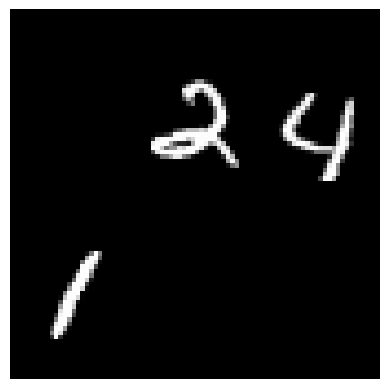


No EXIF data found.


In [ ]:
import os
from PIL import Image
from PIL.ExifTags import TAGS
import matplotlib.pyplot as plt

# Function to extract and print image metadata
def get_image_metadata(image_path):
    try:
        image = Image.open(image_path)
        print(f"Image Format: {image.format}")
        print(f"Image Size: {image.size}")
        print(f"Image Mode: {image.mode}")

        # Display whether the image is grayscale or RGB
        if image.mode == 'L':
            print("This image is grayscale (1 channel).")
        elif image.mode == 'RGB':
            print("This image is RGB (3 channels).")
        else:
            print(f"Image has a different mode: {image.mode}")

        # Display the image using matplotlib
        if image.mode == 'L':
            plt.imshow(image, cmap='gray')  # Grayscale display
        else:
            plt.imshow(image)  # RGB or other modes
        plt.axis('off')  # Hide axis
        plt.show()

        # Extract EXIF data
        exif_data = image._getexif()
        if exif_data:
            print("\n--- EXIF Metadata ---")
            for tag, value in exif_data.items():
                tag_name = TAGS.get(tag, tag)
                print(f"{tag_name}: {value}")
        else:
            print("\nNo EXIF data found.")
    except Exception as e:
        print(f"Error loading image: {e}")

# Path to your image
image_path = "/content/dataset2/triple_mnist/train/124/10_124.png"  # Change this to the path of your image

# Print the metadata and display the image
get_image_metadata(image_path)



 ### Dataset Directory Setup and File Splitting:

 Description: In this section, you are reorganising the dataset by splitting the images into training, validation, and test sets based on predefined ratios (60% train, 20% validation, 20% test). The files are copied into new directories structured in a way that can be easily fed into machine learning models for training and evaluation.

In [ ]:
# Import Libraries
import os
import shutil
from pathlib import Path
import random

# Paths to original directories
original_base_dir = Path('dataset2/triple_mnist')
original_train_dir = original_base_dir / 'train'
original_val_dir = original_base_dir / 'val'
original_test_dir = original_base_dir / 'test'

# Path to the new dataset directory
new_base_dir = Path('dataset-c/triple_mnist')
new_train_dir = new_base_dir / 'train'
new_val_dir = new_base_dir / 'val'
new_test_dir = new_base_dir / 'test'

# Ensure the new directories exist
new_train_dir.mkdir(parents=True, exist_ok=True)
new_val_dir.mkdir(parents=True, exist_ok=True)
new_test_dir.mkdir(parents=True, exist_ok=True)

# Function to split and copy files
def split_and_copy_files(src_dir, new_train_dir, new_val_dir, new_test_dir, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
    if not src_dir.exists():
        return

    classes = sorted(os.listdir(src_dir))

    for cls in classes:
        cls_path = src_dir / cls
        if cls_path.is_dir():
            images = list(cls_path.glob('*'))
            random.shuffle(images)

            num_train = int(len(images) * train_ratio)
            num_val = int(len(images) * val_ratio)

            train_images = images[:num_train]
            val_images = images[num_train:num_train+num_val]
            test_images = images[num_train+num_val:]

            cls_train_dir = new_train_dir / cls
            cls_val_dir = new_val_dir / cls
            cls_test_dir = new_test_dir / cls

            cls_train_dir.mkdir(parents=True, exist_ok=True)
            cls_val_dir.mkdir(parents=True, exist_ok=True)
            cls_test_dir.mkdir(parents=True, exist_ok=True)

            for img in train_images:
                shutil.copy(str(img), str(cls_train_dir / img.name))
            for img in val_images:
                shutil.copy(str(img), str(cls_val_dir / img.name))
            for img in test_images:
                shutil.copy(str(img), str(cls_test_dir / img.name))

# Split and copy files from original train, val, and test directories
split_and_copy_files(original_train_dir, new_train_dir, new_val_dir, new_test_dir)
split_and_copy_files(original_val_dir, new_train_dir, new_val_dir, new_test_dir)
split_and_copy_files(original_test_dir, new_train_dir, new_val_dir, new_test_dir)

print("Files split and copied successfully!")

Files split and copied successfully!


### Importing Essential Libraries

Description: This section imports the key libraries and modules required for handling data, building and training a CNN model, and visualising results. These include tools for image processing, deep learning model construction, and utilities for handling class imbalances.It includes the Keras Tuner library for hyperparameter tuning, as well as key Keras components like Conv2D, Dense, Adam, and callback methods such as EarlyStopping and ReduceLROnPlateau.

In [ ]:
#  import keras_tuner as kt
!pip install keras-tuner -q

import os
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


### Dataset Preparation and Image Loading
Description: In this section, directories for training, validation, and testing datasets are defined. It also specifies image size, batch size, and creates ImageDataGenerator instances to rescale pixel values and load the images in grayscale mode. These generators are then used to load images into the model for training, validation, and testing, ensuring data is ready for further processing.

In [ ]:
# Define directories for training, validation, and testing datasets
train_dir = os.path.join('/content/dataset-c/triple_mnist/train')
val_dir = os.path.join('/content/dataset-c/triple_mnist/val')
test_dir = os.path.join('/content/dataset-c/triple_mnist/test')

# Image size and batch size
image_size = (42, 42)
batch_size = 32

# Create ImageDataGenerator with color_mode set to 'grayscale'
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images with 'grayscale' mode
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=False
)

Found 60000 images belonging to 1000 classes.
Found 20000 images belonging to 1000 classes.
Found 20000 images belonging to 1000 classes.


### Sample Preprocessed Images
Description: This code grabs a batch of preprocessed images from the data generator (train_generator) and displays them using matplotlib.

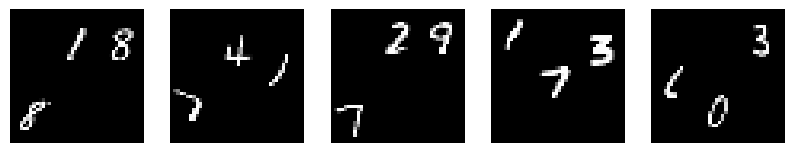

In [ ]:
import matplotlib.pyplot as plt

# Fetch one batch of images and labels from the data generator (assuming `train_generator` is defined)
images, labels = next(train_generator)  # This gets one batch of preprocessed images

# Set how many images you want to display
num_images = 5

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i].reshape(42, 42), cmap='gray')  # Assuming images are 42x42 and grayscale
    plt.axis('off')
plt.show()


###Building the Model - Hyperparameter Tuning with Keras Tuner

Description: This section sets up the Keras Tuner to optimize the hyperparameters of the CNN model, including the number of filters, dense units, dropout rate, learning rate, L2 regularization, batch size, and activation function. It uses the Hyperband search algorithm and evaluates the model based on validation accuracy.

In [ ]:
from tensorflow.keras.layers import Input

# Function to build the model with hyperparameters
def build_model(hp):
    model = Sequential()

    # Define the input layer explicitly to avoid warnings
    model.add(Input(shape=(42, 42, 1)))

    # Hyperparameters to tune
    hp_filters_1 = hp.Int('filters_1', min_value=32, max_value=128, step=32)
    hp_filters_2 = hp.Int('filters_2', min_value=64, max_value=256, step=64)
    hp_dense_units = hp.Int('dense_units', min_value=64, max_value=256, step=64)
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    hp_l2_reg = hp.Float('l2_regularization', min_value=1e-5, max_value=1e-2, sampling='log')
    hp_batch_size = hp.Choice('batch_size', values=[16, 32, 64])
    hp_activation = hp.Choice('activation', values=['relu', 'leaky_relu', 'sigmoid', 'tanh'])

    # First convolutional layer
    model.add(Conv2D(hp_filters_1, (3, 3), kernel_regularizer=l2(hp_l2_reg)))
    if hp_activation == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(hp_activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(Conv2D(hp_filters_2, (3, 3), kernel_regularizer=l2(hp_l2_reg)))
    if hp_activation == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(hp_activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Fully connected layer
    model.add(Flatten())
    model.add(Dense(hp_dense_units, kernel_regularizer=l2(hp_l2_reg)))
    if hp_activation == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(hp_activation))
    model.add(BatchNormalization())
    model.add(Dropout(hp_dropout_rate))

    # Output layer
    model.add(Dense(train_generator.num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model



###Hyperparameter Tuning with Keras Tune
Description:
This section sets up the Keras Tuner using the Hyperband search algorithm. It defines the objective (val_accuracy) to optimize and sets a maximum of 20 epochs. The results will be saved in the specified directory.

In [ ]:
# Instantiate the Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_dir',
    project_name='cnn_tuning'
)


###Callbacks and Running the Hyperparameter Search
Description:
This section defines two callbacks: EarlyStopping to halt training when the validation loss stops improving, and ReduceLROnPlateau to reduce the learning rate when the validation loss plateaus. Then, it runs the hyperparameter tuning using the tuner.search function on the training and validation datasets.

*  The output below represents a typicle run mid flow during the 30 Trial runs. The final results are captured in the next output cell
*  We had added Suppression for ‘userwarnings’ as they are only related to depreciation issues

In [ ]:
# Suppress Userwarnigs
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

# Run the hyperparameter search
tuner.search(train_generator,
             epochs=20,
             validation_data=val_generator,
             callbacks=[early_stopping, reduce_lr])


Trial 1 Complete [00h 17m 04s]
val_accuracy: 0.00139999995008111

Best val_accuracy So Far: 0.00139999995008111
Total elapsed time: 00h 17m 04s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
64                |32                |filters_1
256               |64                |filters_2
128               |256               |dense_units
0.3               |0.2               |dropout_rate
0.0054484         |0.0034253         |learning_rate
7.9613e-05        |2.4704e-05        |l2_regularization
64                |16                |batch_size
sigmoid           |tanh              |activation
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3
 260/1875 ━━━━━━━━━━━━━━━━━━━━ 11:18 420ms/step - accuracy: 5.5819e-04 - loss: 7.2866

###Retrieve Best Hyperparameters and Model
Description:
Once the search is complete, this section retrieves the best set of hyperparameters and the model associated with those parameters. It then prints out the optimal values for each hyperparameter.

In [ ]:
# Get the best hyperparameters and model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(f"Filters for 1st Conv Layer: {best_hp.get('filters_1')}")
print(f"Filters for 2nd Conv Layer: {best_hp.get('filters_2')}")
print(f"Dense Units: {best_hp.get('dense_units')}")
print(f"Dropout Rate: {best_hp.get('dropout_rate')}")
print(f"Learning Rate: {best_hp.get('learning_rate')}")
print(f"L2 Regularization: {best_hp.get('l2_regularization')}")
print(f"Batch Size: {best_hp.get('batch_size')}")
print(f"Activation Function: {best_hp.get('activation')}")


Best Hyperparameters:
Filters for 1st Conv Layer: 96
Filters for 2nd Conv Layer: 64
Dense Units: 128
Dropout Rate: 0.4
Learning Rate: 0.00025071332274895686
L2 Regularization: 0.002369069534544757
Batch Size: 16
Activation Function: leaky_relu


###Model Summary and Final Training
Description:
This section prints the architecture of the best model found by the tuner. It then trains the model using the optimal hyperparameters on the full dataset for 20 epochs with the defined callbacks.

In [ ]:
# Print the model architecture
print("\nWinning Model Architecture:")
best_model.summary()

# Train the model with the best hyperparameters on the full dataset
history = best_model.fit(train_generator,
                         epochs=20,
                         validation_data=val_generator,
                         callbacks=[early_stopping, reduce_lr])



Winning Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 40, 40, 96)          │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 40, 40, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 40, 40, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 20, 20, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 18, 18, 64)          │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 18, 18, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         663,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │         129,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,549,306 (9.72 MB)

 Trainable params: 849,576 (3.24 MB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 1,699,154 (6.48 MB)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 535s 285ms/step - accuracy: 0.9333 - loss: 0.4114 - val_accuracy: 0.9598 - val_loss: 0.3527 - learning_rate: 2.5071e-04
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 564s 287ms/step - accuracy: 0.9460 - loss: 0.4010 - val_accuracy: 0.9516 - val_loss: 0.4054 - learning_rate: 2.5071e-04
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 550s 280ms/step - accuracy: 0.9510 - loss: 0.3968 - val_accuracy: 0.9471 - val_loss: 0.4171 - learning_rate: 2.5071e-04
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 519s 277ms/step - accuracy: 0.9508 - loss: 0.4001 - val_accuracy: 0.9445 - val_loss: 0.4331 - learning_rate: 2.5071e-04
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 521s 278ms/step - accuracy: 0.9663 - loss: 0.3591 - val_accuracy: 0.9670 - val_loss: 0.3300 - learning_rate: 5.0143e-05
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 521s 277ms/step - accuracy: 0.9828 - loss: 0.2813 - val_accuracy: 0.9679 - val_loss: 0.3010 - learning_rate: 5.0143e-05
Epoch 7/20
1875/1875 ━━━━━━━

###Plot Learning Curves
Description:
This section visualises the training and validation accuracy and loss over time by plotting the learning curves. It uses matplotlib to display two subplots: one for accuracy and one for loss.

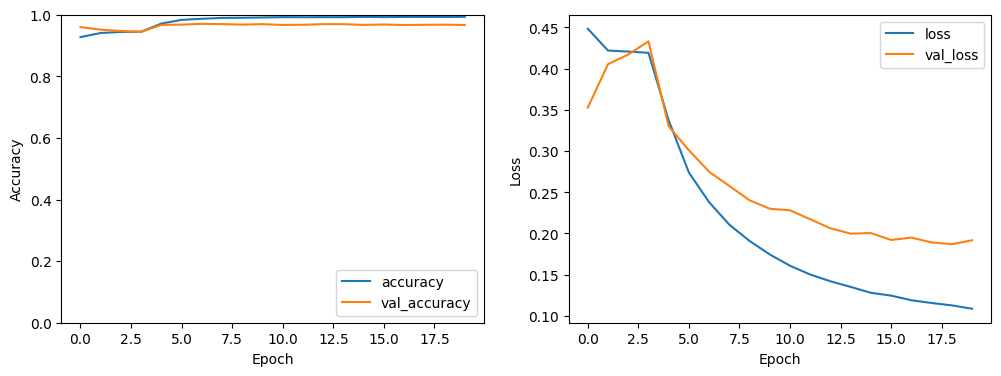

In [ ]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


###Evaluate the Model on Test Data
Description:
This section evaluates the best model on the test dataset and prints the resulting accuracy. This provides a measure of how well the model generalizes to unseen data.

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.9726 - loss: 0.1680
Test accuracy: 0.9683


###Confusion Matrix Normalization
Description: This section normalizes the confusion matrix by dividing each element by the sum of the respective rows (i.e., the number of occurrences for each class). It ensures that each row sums to 1 and visualizes the normalized matrix for better understanding of the classifier's performance.

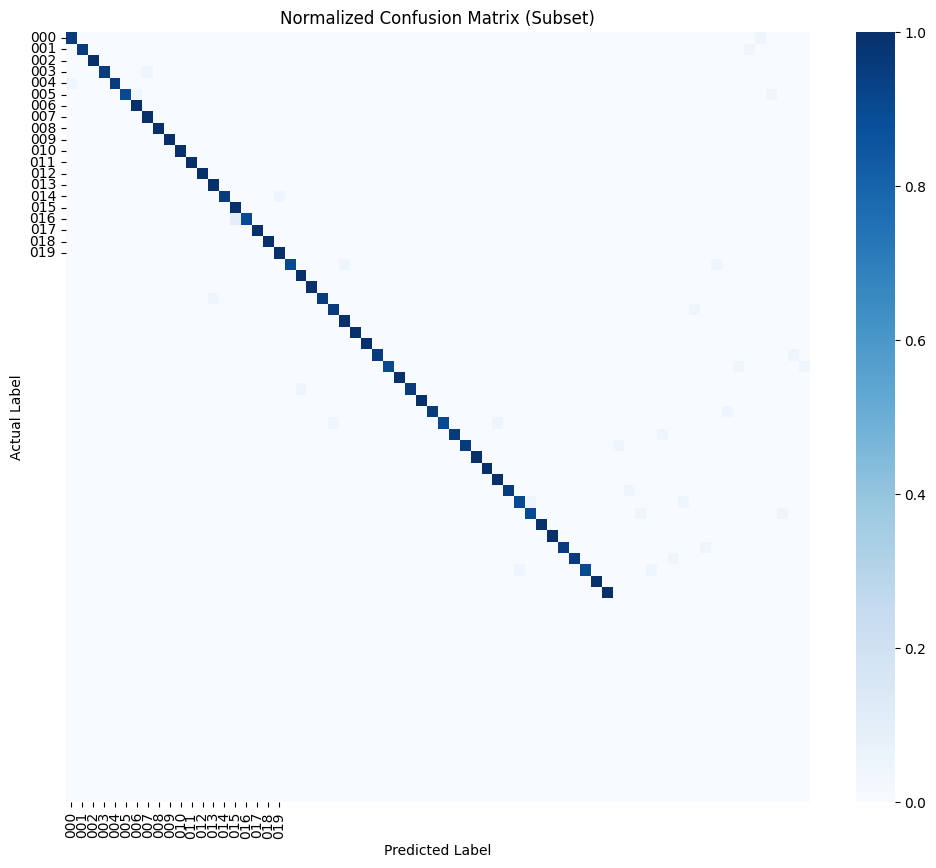

In [ ]:
# Normalize the confusion matrix by dividing each value by the sum of its row (i.e., number of actual occurrences per class)
# Add a small value (epsilon) to avoid division by zero
epsilon = 1e-10  # Small value to prevent division by zero
conf_matrix_subset_normalized = conf_matrix_subset.astype('float') / (conf_matrix_subset.sum(axis=1)[:, np.newaxis] + epsilon)

plt.figure(figsize=(12, 10))  # Increase the size of the figure
sns.heatmap(conf_matrix_subset_normalized, annot=False, fmt='.2f', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys())[:20],  # Limit to first 20 classes for readability
            yticklabels=list(test_generator.class_indices.keys())[:20])  # Adjust this number as needed
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title('Normalized Confusion Matrix (Subset)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


###Classification Report Generation
Description: This section generates a classification report for the model, including precision, recall, f1-score, and support for each class. It prints a summary for the entire dataset based on the model’s predictions.

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for the test set
pred_probabilities = best_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Convert probabilities to class indices
pred_classes = np.argmax(pred_probabilities, axis=1)

# Get true classes
true_classes = test_generator.classes

# Generate a classification report
report = classification_report(true_classes, pred_classes, target_names=test_generator.class_indices.keys())
print(report)


625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
              precision    recall  f1-score   support

         000       0.95      0.95      0.95        20
         001       1.00      0.95      0.97        20
         002       1.00      1.00      1.00        20
         003       1.00      0.95      0.97        20
         004       1.00      0.95      0.97        20
         005       1.00      0.90      0.95        20
         006       0.91      1.00      0.95        20
         007       0.95      1.00      0.98        20
         008       1.00      1.00      1.00        20
         009       1.00      1.00      1.00        20
         010       1.00      1.00      1.00        20
         011       1.00      1.00      1.00        20
         012       1.00      1.00      1.00        20
         013       0.95      1.00      0.98        20
         014       1.00      0.95      0.97        20
         015       0.87      1.00      0.93        20
         016       0.95      0.90      

###Generating and Converting Classification Report to Dictionary Format
Description:
This section of the code generates a detailed classification report using sklearn.metrics.classification_report, which includes metrics like precision, recall, F1-score, and support for each class based on the true labels and predicted labels from the model. Additionally, it converts the report into a dictionary format for further analysis or processing.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming true_classes and pred_classes are already defined
true_classes = test_generator.classes  # Actual classes
pred_probabilities = best_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
pred_classes = np.argmax(pred_probabilities, axis=1)

# Generate classification report and convert it to dictionary format
classification_report_dict = classification_report(true_classes, pred_classes, output_dict=True)


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


###F1-Score Visualization per Class
Description: This section visualizes the F1-score for each class using bar plots. It provides various visualizations, such as showing the top classes by F1-score and the bottom classes, for deeper performance analysis.



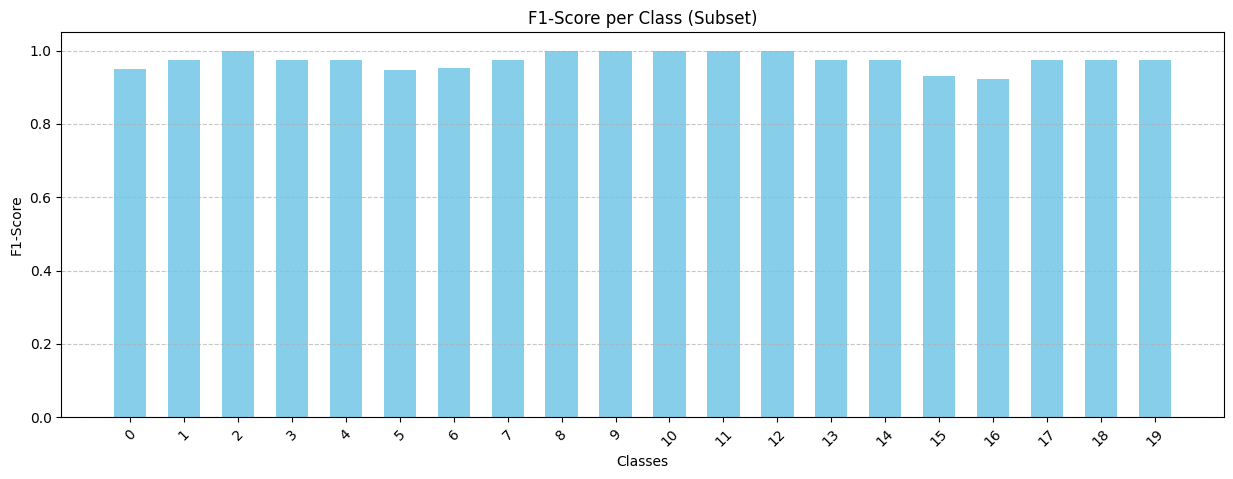

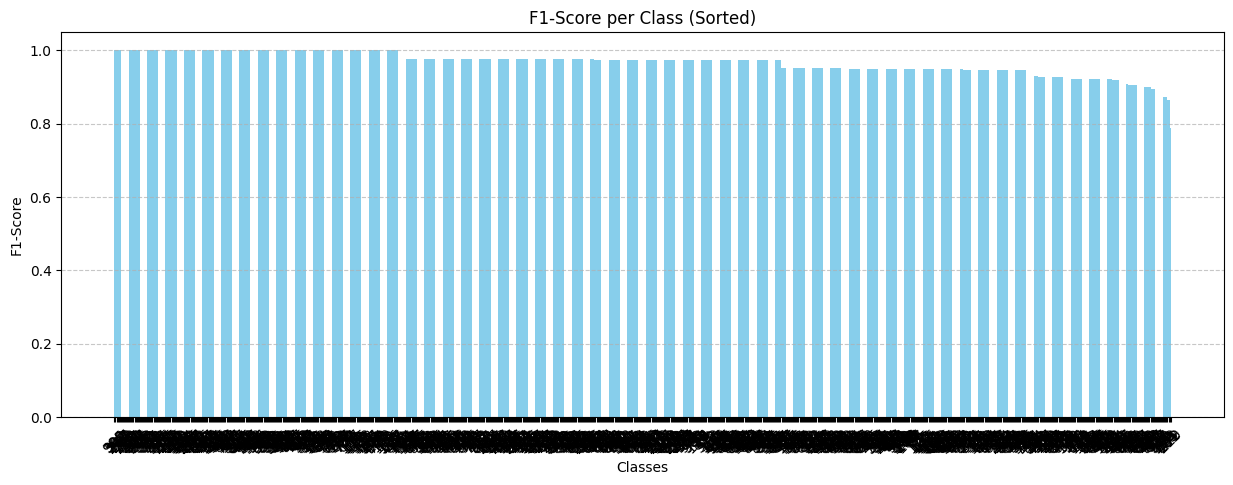

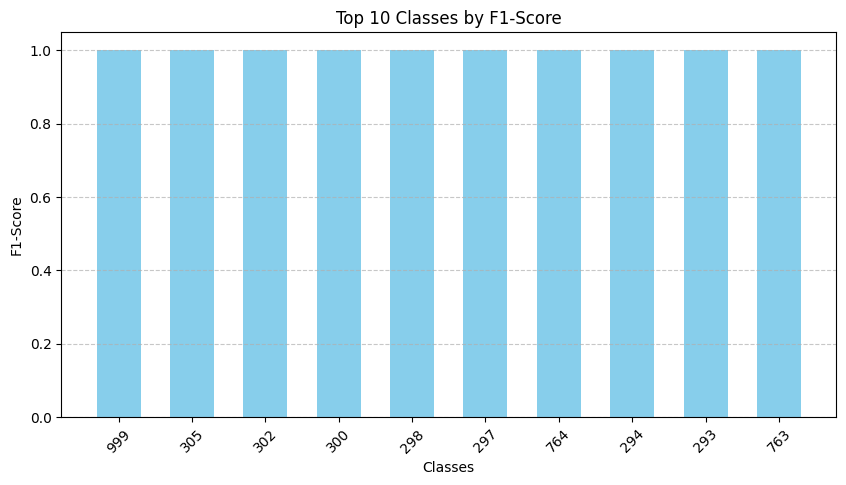

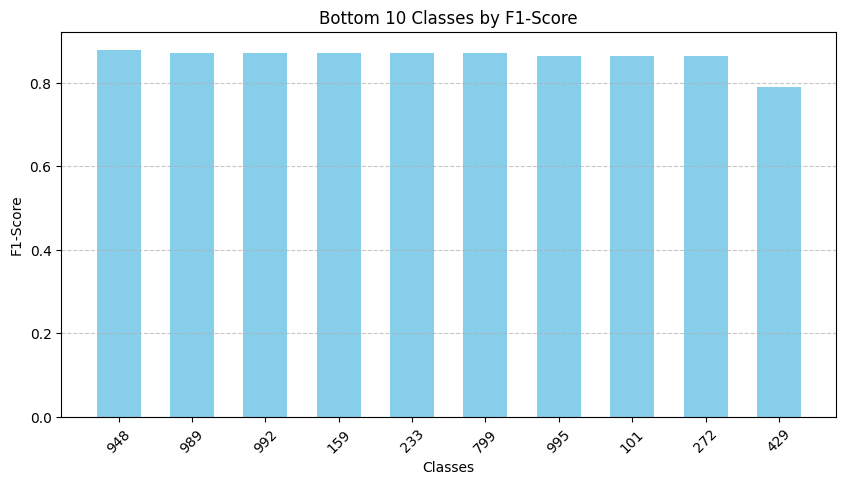

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the classification report to a DataFrame for easier plotting
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Exclude 'accuracy', 'macro avg', and 'weighted avg' from the plot
class_scores = classification_report_df[:-3]

# Plotting F1-score for a subset of classes (e.g., first 20)
plt.figure(figsize=(15, 5))
plt.bar(class_scores.index[:20], class_scores['f1-score'][:20], color='skyblue', width=0.6)
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score per Class (Subset)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Sorting classes by F1-score and plotting
sorted_class_scores = class_scores.sort_values('f1-score', ascending=False)

plt.figure(figsize=(15, 5))
plt.bar(sorted_class_scores.index, sorted_class_scores['f1-score'], color='skyblue', width=0.6)
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score per Class (Sorted)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting the top 10 classes with highest F1-score
plt.figure(figsize=(10, 5))
plt.bar(sorted_class_scores.index[:10], sorted_class_scores['f1-score'][:10], color='skyblue', width=0.6)
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('Top 10 Classes by F1-Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting the bottom 10 classes with lowest F1-score
plt.figure(figsize=(10, 5))
plt.bar(sorted_class_scores.index[-10:], sorted_class_scores['f1-score'][-10:], color='skyblue', width=0.6)
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('Bottom 10 Classes by F1-Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###Precision-Recall Curve
Description: This section generates and visualises the precision-recall curve for each class, allowing evaluation of how the model performs across recall thresholds for different classes.

y_true shape: (20000,)
y_scores shape: (20000, 1000)
First few y_true values: [0 0 0 0 0 0 0 0 0 0]
First few y_scores values: [[9.9997234e-01 9.6974055e-09 6.1919415e-08 ... 2.7081631e-18
  2.1390729e-20 7.8455724e-18]
 [9.9875736e-01 6.7820247e-07 8.3750410e-07 ... 6.3578431e-16
  5.5083688e-15 1.7614780e-14]
 [9.9999142e-01 4.9902667e-08 2.2221360e-07 ... 4.0756299e-21
  3.9861243e-22 9.4064643e-22]
 ...
 [9.9978364e-01 6.4743409e-07 1.4492034e-05 ... 8.5633509e-17
  4.2193838e-18 8.3385371e-17]
 [9.5893842e-01 8.1021646e-08 2.8418785e-07 ... 2.3787498e-17
  3.0798126e-16 2.1578956e-15]
 [9.9923742e-01 3.6978199e-07 1.9335754e-07 ... 5.0199189e-17
  7.7999745e-20 1.8309494e-17]]


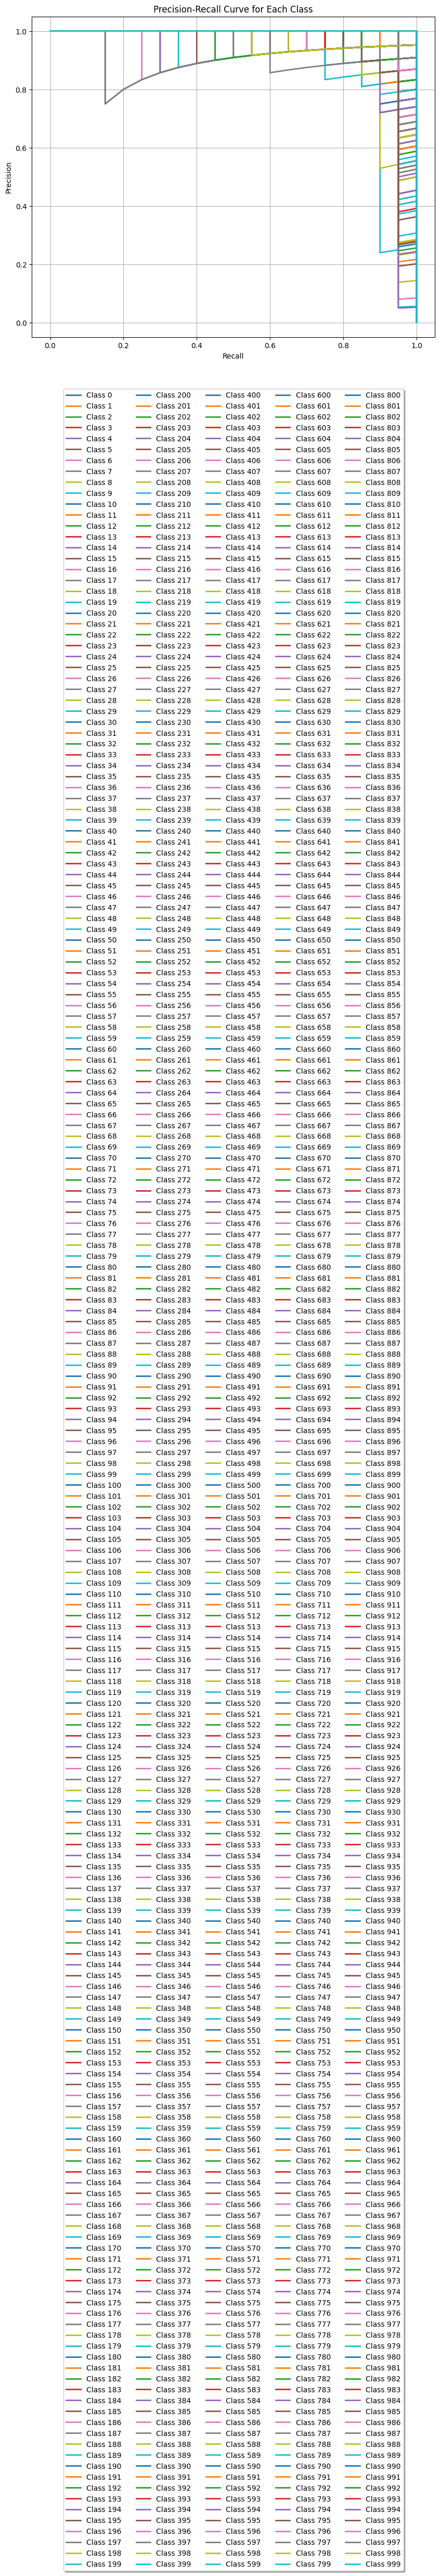

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import tensorflow as tf

# Suppress TensorFlow logging
tf.get_logger().setLevel('ERROR')

# Assuming you have your test generator
test_generator.reset()  # Reset generator to start from the beginning

# Obtain true classes and predicted probabilities
y_true = []
y_scores = []

# Loop through the test generator to get all batches
for _ in range(len(test_generator)):
    X_batch, y_batch = next(test_generator)
    y_true.extend(np.argmax(y_batch, axis=1))
    y_scores_batch = best_model.predict(X_batch, verbose=0)  # Suppress verbose output with verbose=0
    y_scores.extend(y_scores_batch)

# Convert lists to numpy arrays for easier processing
y_true = np.array(y_true)
y_scores = np.array(y_scores)

# Debugging outputs
print(f'y_true shape: {y_true.shape}')
print(f'y_scores shape: {y_scores.shape}')
print(f'First few y_true values: {y_true[:10]}')
print(f'First few y_scores values: {y_scores[:10]}')

# Generate precision-recall curves for each class
plt.figure(figsize=(10, 8))

for i in range(len(test_generator.class_indices)):  # Loop through each class
    precision, recall, _ = precision_recall_curve(y_true == i, y_scores[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)  # Adjust legend position
plt.grid(True)
plt.show()


###ROC Curve Visualization
Description: This section generates ROC curves for each class and visualizes the true positive rate (sensitivity) against the false positive rate (1-specificity).

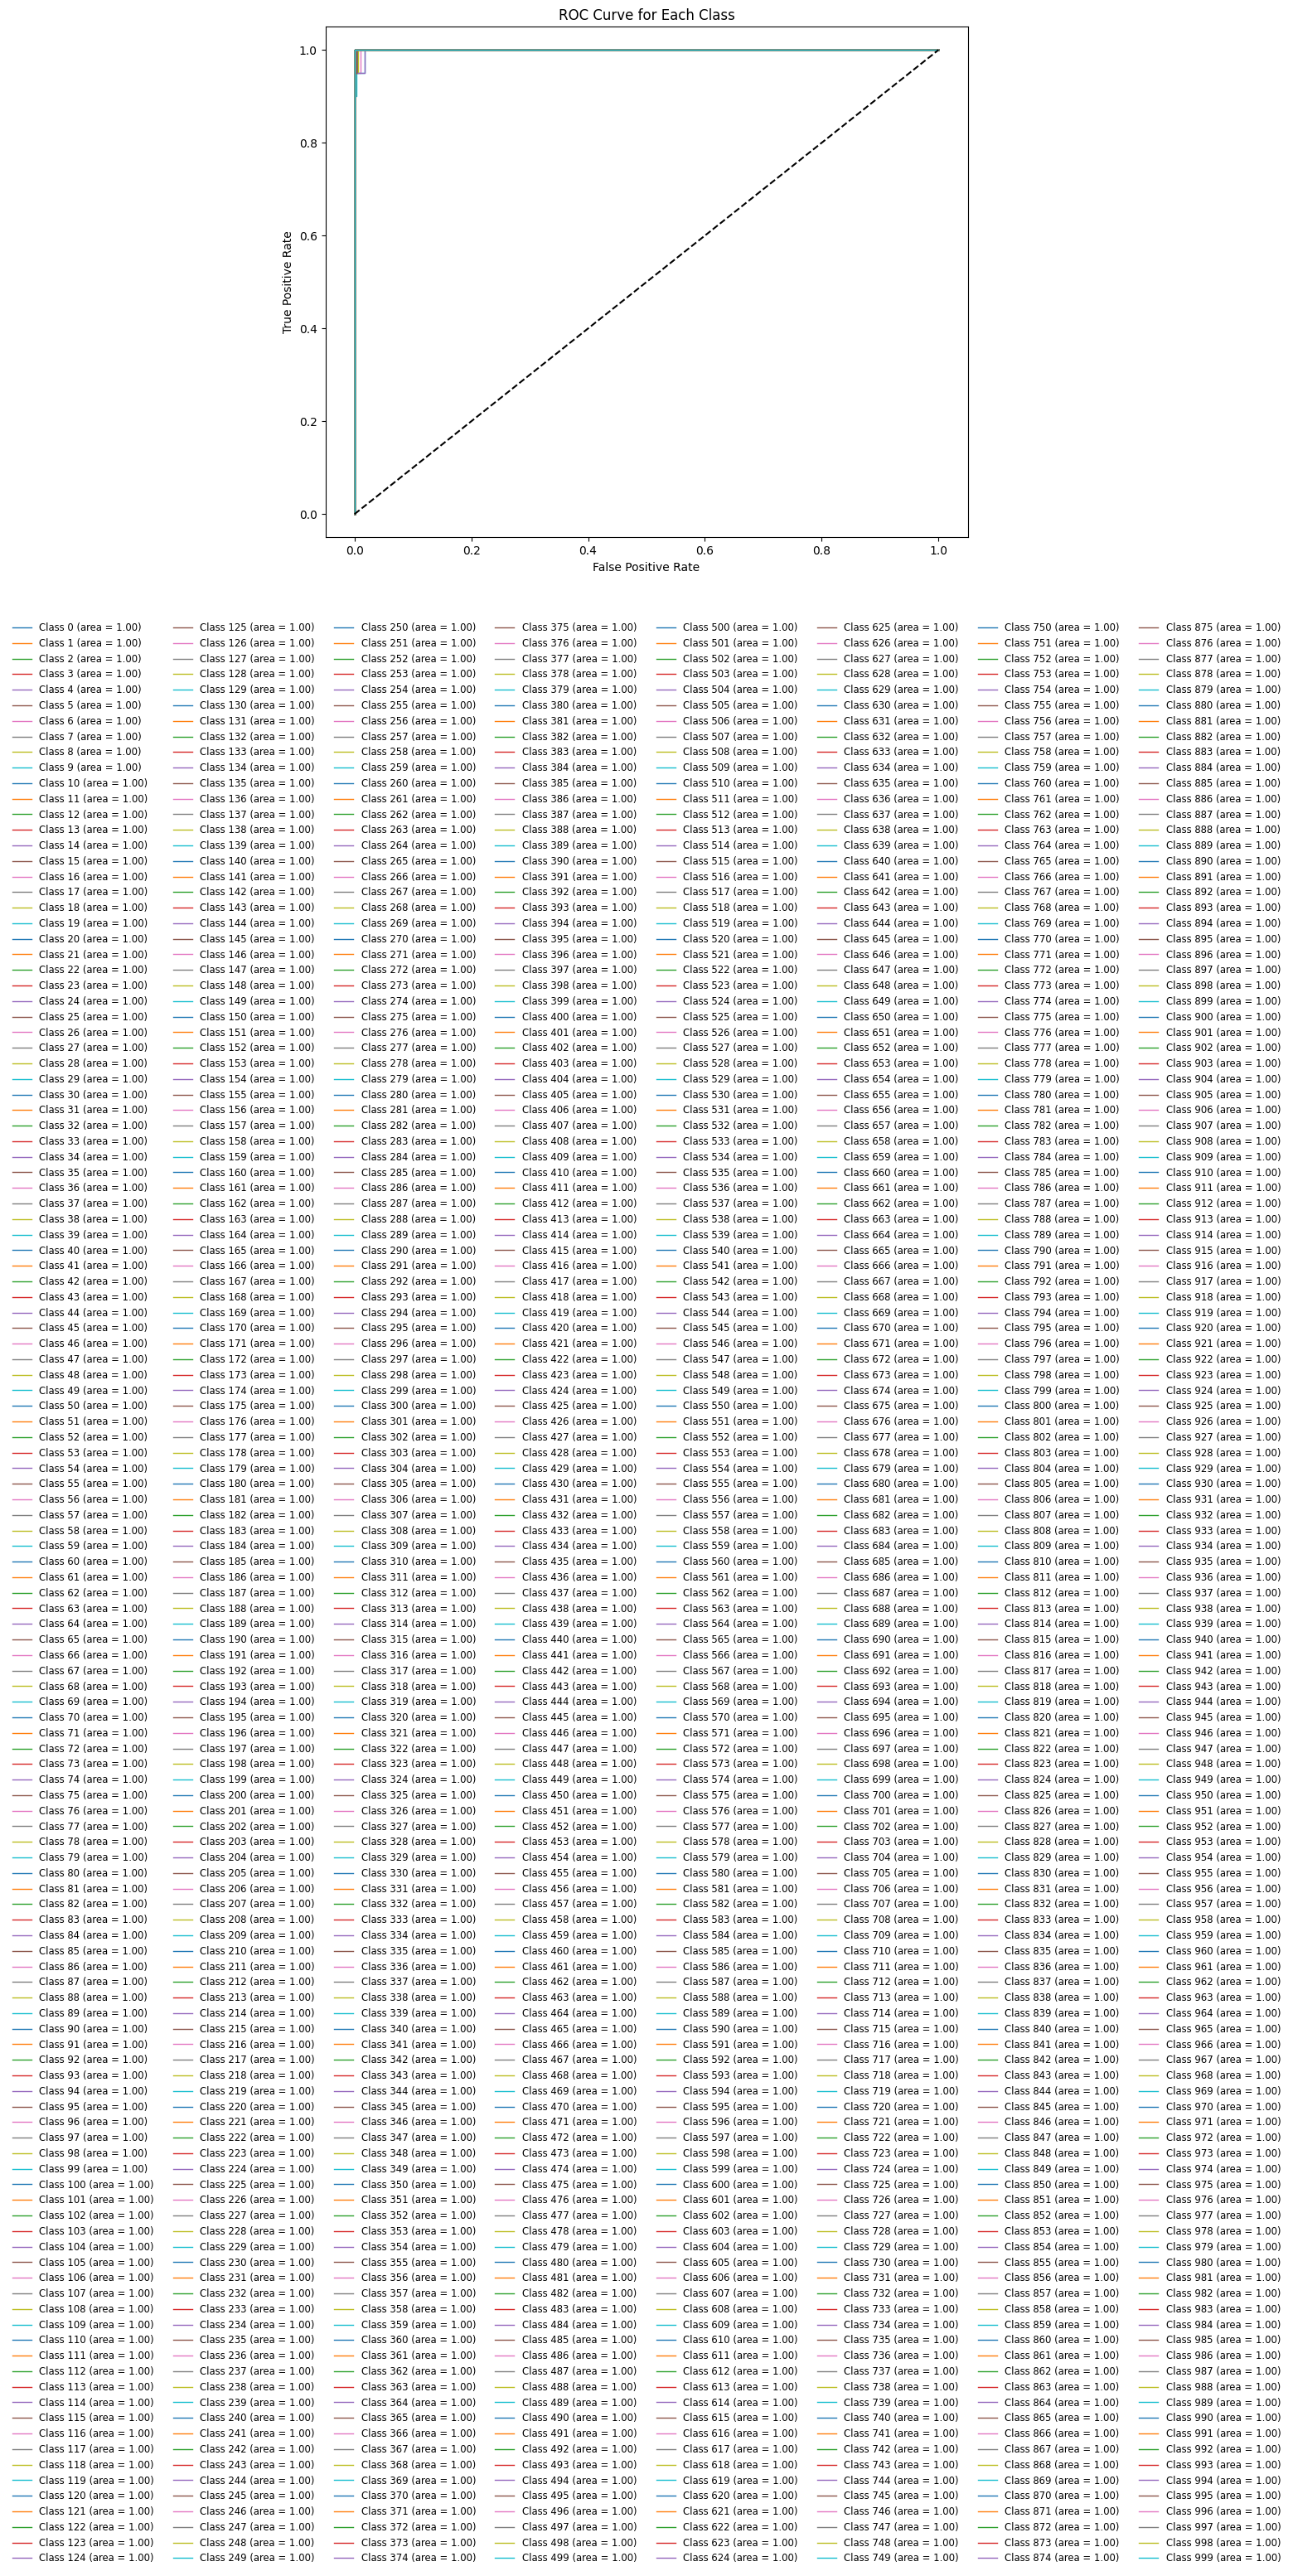

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output classes for multiclass ROC calculation
n_classes = len(test_generator.class_indices)
y_true_bin = label_binarize(true_classes, classes=list(range(n_classes)))

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], pred_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')

# Modify the legend to place it below the plot and format it as a square
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, fontsize='small', frameon=False)

plt.show()


###Visualization of Correct and Incorrect Predictions in CNN
Description:
This code is designed to visualize the results of a Convolutional Neural Network (CNN) by displaying a few examples of both correct and incorrect predictions made by the model on the dataset. It iterates over batches of images, identifies where the model predictions are correct or incorrect, and plots a few examples of each. The displayed images show the predicted class and the true class, helping assess how well the model is performing and understand common mistakes it may be making.

Key functionalities include:
*   Displaying correctly predicted images with the predicted class label.
*   Displaying incorrectly predicted images alongside both the predicted and true class labels.
*   Ensuring that multiple examples are shown in a neatly arranged grid for easy comparison.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


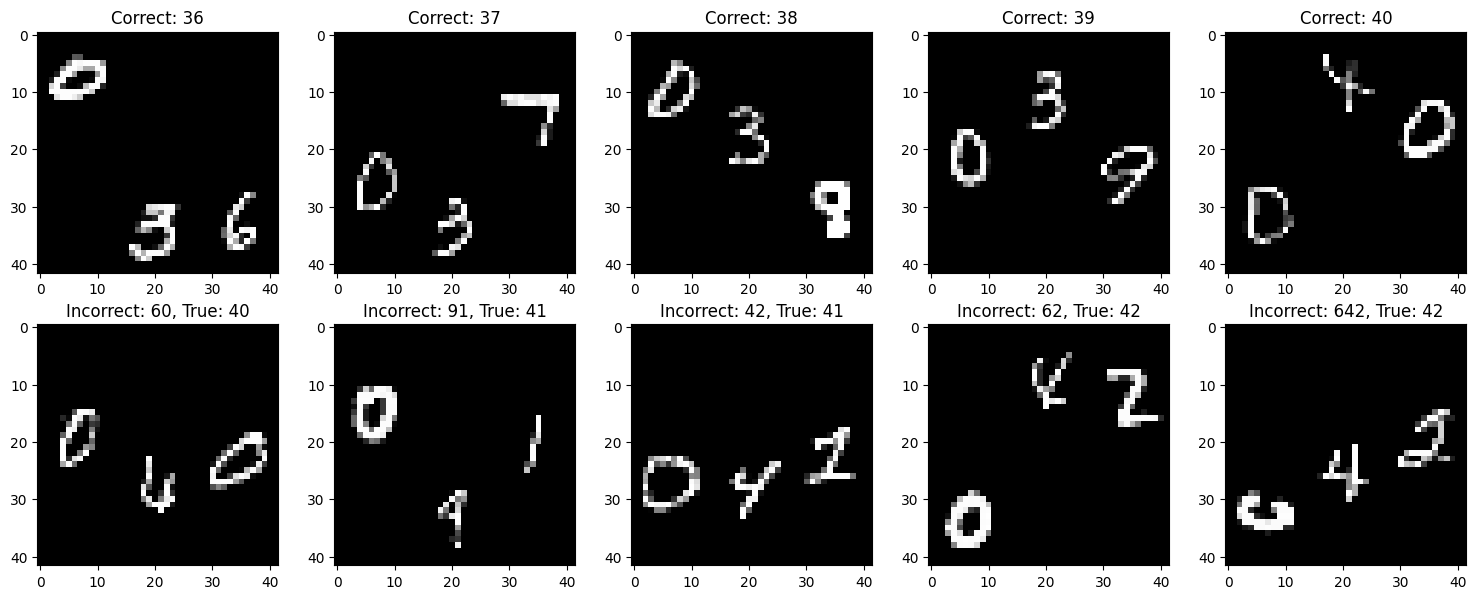

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Show a few examples of correct and incorrect predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

correct_count = 0
incorrect_count = 0
seen_correct_classes = set()
seen_incorrect_classes = set()

# Iterate over multiple batches
while correct_count < 5 or incorrect_count < 5:
    X_batch, y_batch = next(test_generator)
    pred_probs = best_model.predict(X_batch)
    preds = np.argmax(pred_probs, axis=1)

    # Process correct predictions
    if correct_count < 5:
        correct_indices = np.where(preds == np.argmax(y_batch, axis=1))[0]
        for index in correct_indices:
            predicted_class = preds[index]
            if correct_count < 5 and predicted_class not in seen_correct_classes:
                axes[correct_count].set_title(f'Correct: {predicted_class}')
                axes[correct_count].imshow(X_batch[index].squeeze(), cmap='gray')
                correct_count += 1
                seen_correct_classes.add(predicted_class)
            if correct_count >= 5:
                break

    # Process incorrect predictions
    if incorrect_count < 5:
        incorrect_indices = np.where(preds != np.argmax(y_batch, axis=1))[0]
        for index in incorrect_indices:
            predicted_class = preds[index]
            true_class = np.argmax(y_batch[index])
            if incorrect_count < 5 and (predicted_class, true_class) not in seen_incorrect_classes:
                axes[5 + incorrect_count].set_title(f'Incorrect: {predicted_class}, True: {true_class}')
                axes[5 + incorrect_count].imshow(X_batch[index].squeeze(), cmap='gray')
                incorrect_count += 1
                seen_incorrect_classes.add((predicted_class, true_class))
            if incorrect_count >= 5:
                break

    # Check if all required images have been found
    if correct_count >= 5 and incorrect_count >= 5:
        break

plt.tight_layout()
plt.show()
